<a href="https://colab.research.google.com/github/Gdearmascasta/Entregas_data/blob/main/Entregable_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega de la tarea #1
*German Eduardo De Armas Castaño - T00068765*

 <img src="https://mundonoticias.com.co/wp-content/uploads/2023/09/logo-utb_8526706_20230919150705.jpg" alt="UTB Logo" width = "300" >


#Las imágenes utilizadas en este análisis se cargaron de forma local. Por lo tanto, se recomienda no ejecutar el código a menos que se disponga de las imágenes requeridas.



In [ ]:
!pip3 install scikit-image --break-system-packages


In [ ]:
from skimage import data, color
import matplotlib.pyplot as plt
import numpy as np

**Analisis de imagen "Arteria tapada"**

In [ ]:
#Este módulo (files) permite interactuar con el sistema de archivos en Google Colab,específicamente para cargar y descargar archivos.
from google.colab import files
uploaded = files.upload()
art_tapada = list(uploaded.keys())[0]

Saving images (1).jpg to images (1) (1).jpg


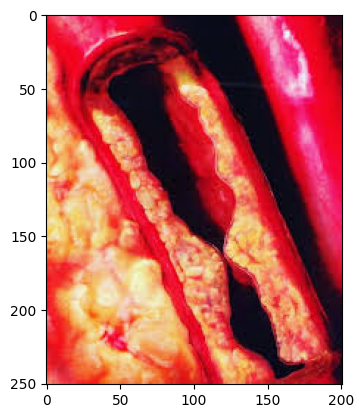

In [ ]:
from PIL import Image

# Cargar la imagen usando Pillow
imagen_1 = Image.open(art_tapada)

# Convertir la imagen a un array de numpy
image_array1 = np.array(imagen_1)

# Mostrar la imagen
plt.imshow(image_array1)



array([[[237,  43,  69],
        [242,  54,  79],
        [246,  66,  91],
        ...,
        [ 48,   6,  28],
        [ 48,   6,  28],
        [ 44,  10,  27]],

       [[236,  34,  60],
        [240,  43,  70],
        [244,  58,  82],
        ...,
        [ 46,   7,  28],
        [ 46,   7,  28],
        [ 44,  10,  27]],

       [[235,  22,  52],
        [239,  32,  60],
        [242,  45,  72],
        ...,
        [ 42,   9,  28],
        [ 42,   9,  28],
        [ 44,  10,  27]],

       ...,

       [[240, 127,  93],
        [237, 122,  93],
        [245, 124, 103],
        ...,
        [ 34,  16,  28],
        [ 13,  22,  27],
        [ 29,  13,  24]],

       [[241, 133,  97],
        [237, 126,  96],
        [247, 128, 106],
        ...,
        [ 49,  13,  27],
        [ 29,  19,  28],
        [ 29,  13,  24]],

       [[241, 139, 101],
        [238, 133, 101],
        [246, 134, 110],
        ...,
        [ 66,   9,  26],
        [ 46,  16,  26],
        [ 30,  12,  24]]], dtype=uint8)
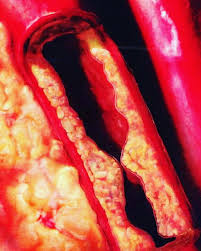

In [ ]:
#Visualizacion del array
image_array1

In [ ]:
# medidas estadisticas vistas en clase
print("Los valores estadisticos de la imagen (arteria tapada) son: ")
print("Las dimensiones de la imagen son: ", image_array1.shape)
print("Valor máximo:", np.max(image_array1))
print("Valor mínimo:", np.min(image_array1))
print("Promedio de intensidad:", np.mean(image_array1))
print("Mediana de intensidad:", np.median(image_array1))
print("Desviación estándar:", np.std(image_array1))

Los valores estadisticos de la imagen (arteria tapada) son: 
Las dimensiones de la imagen son:  (251, 201, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 108.40108223821133
Mediana de intensidad: 87.0
Desviación estándar: 89.287378357159


Text(0.5, 1.0, 'Imagen Recortada')

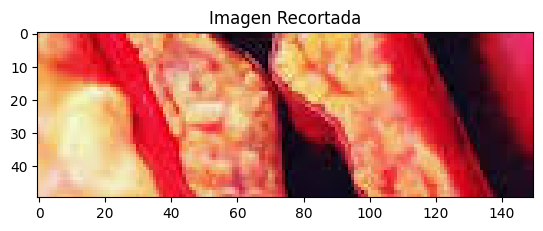

In [ ]:
#Recortar la imagen y presentar este "pedazo"
image_cropped1 = image_array1[150:200, 50:200]
plt.imshow(image_cropped1)
plt.title("Imagen Recortada")

In [ ]:
#mostrar los valores estadisticos de la imagen recortada
print(" Los valores estadisticos de la imagen recortada  son")
print("Las dimensiones de la imagen son: ", image_cropped1.shape)
print("Valor máximo:", np.max(image_cropped1))
print("Valor mínimo:", np.min(image_cropped1))
print("Promedio de intensidad:", np.mean(image_cropped1))
print("Mediana de intensidad:", np.median(image_cropped1))
print("Desviación estándar:", np.std(image_cropped1))

 Los valores estadisticos de la imagen recortada  son
Las dimensiones de la imagen son:  (50, 150, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 123.84471111111111
Mediana de intensidad: 120.0
Desviación estándar: 85.84207862778467


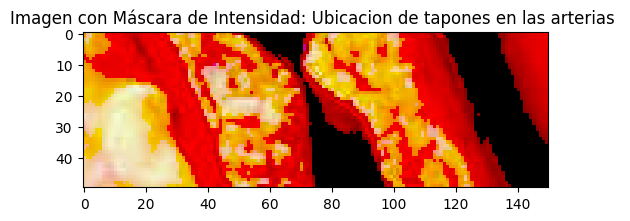

In [ ]:

mask = image_cropped1 > 130  # Crear una máscara de píxeles brillantes con el fin de detallar acumulaciones de grasas
masked_image = np.copy(image_cropped1)
masked_image[~mask] = 0  # Aplicar la máscara

plt.figure(figsize=(6,6))
plt.imshow(masked_image)
plt.title("Imagen con Máscara de Intensidad: Ubicacion de tapones en las arterias ")
plt.axis("on")
plt.show()

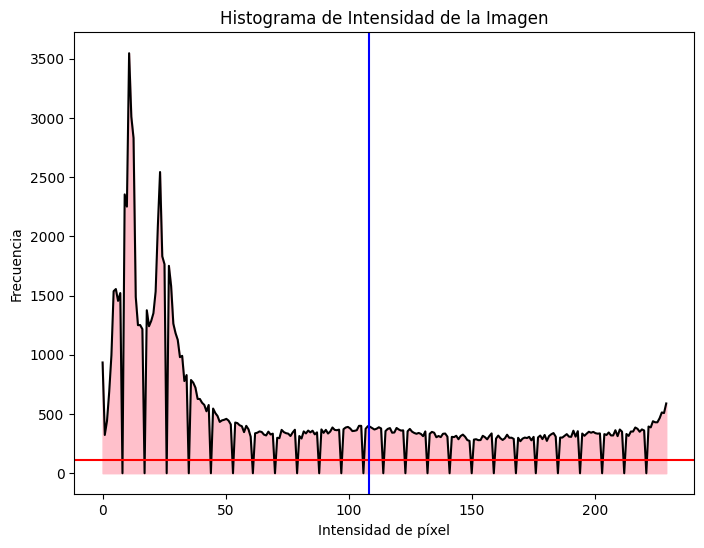

In [ ]:
histogram, bin_edges = np.histogram(image_array1, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(image_array1), color='red')
plt.axvline(np.mean(image_array1), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

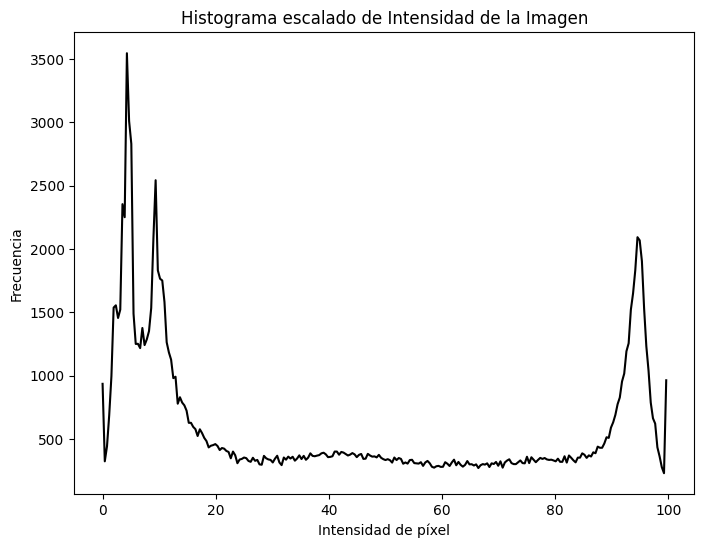

In [ ]:
image_array1_scaled = (image_array1 / 255) * 100

histogram, bin_edges = np.histogram(image_array1_scaled, bins=256, range=(0, 100))

# Graficar el histograma escalado
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma escalado de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.show()

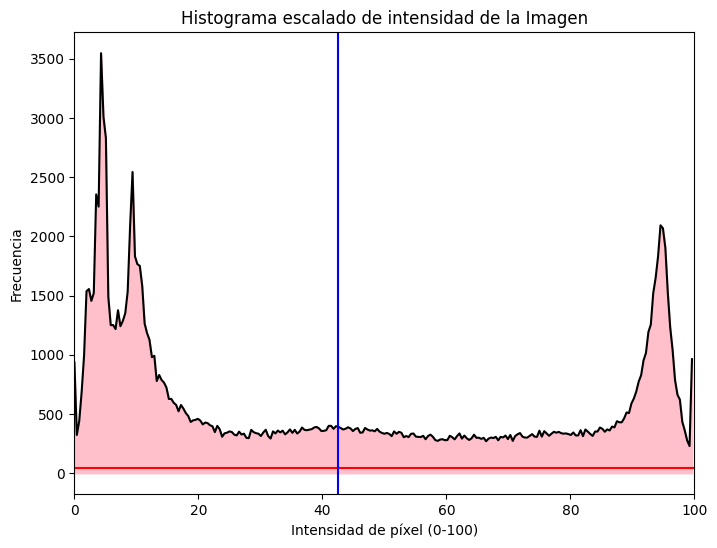

In [ ]:

# Calcular el histograma con el rango deseado
histogram, bin_edges = np.histogram(image_array1_scaled, bins=256, range=(0, 100))

# Graficar el histograma escalado
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.axvspan(np.mean(image_cropped1), 100, alpha=0.2)
plt.title("Histograma escalado de intensidad de la Imagen")
plt.xlabel("Intensidad de píxel (0-100)")  # Actualizar la etiqueta del eje x
plt.ylabel("Frecuencia")
plt.xlim([0, 100])  # Establecer los límites del eje x
ax = image_array1_scaled # Actualiza la variable ax
plt.axhline(np.mean(image_array1_scaled), color='red')
plt.axvline(np.mean(image_array1_scaled), color='blue')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
art_sana1 = list(uploaded.keys())[0]

Saving arteria sana 1.avif to arteria sana 1.avif


In [ ]:
!pip install pillow-avif-plugin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 77.4 MB/s eta 0:00:00


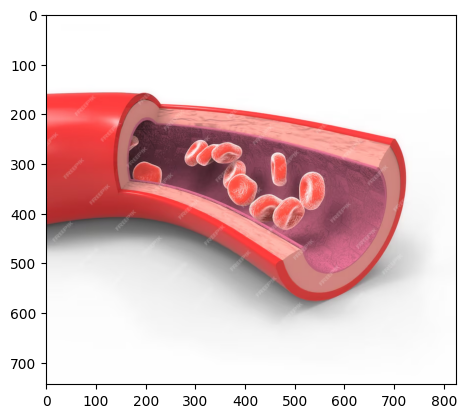

In [ ]:
from PIL import Image
import pillow_avif

# Cargar la imagen usando Pillow
imagen_sana1= Image.open(art_sana1)

# Convertir la imagen a un array de numpy
sana_array1 = np.array(imagen_sana1)

# Mostrar la imagen
plt.imshow(sana_array1)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
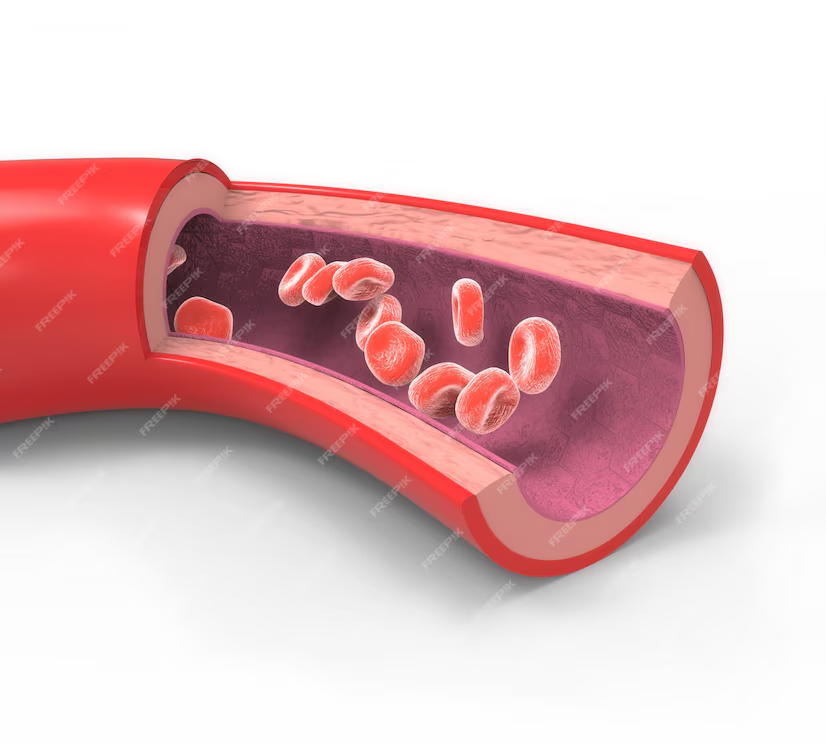

In [ ]:
sana_array1

In [ ]:
print("Los valores estadisticos de la imagen (arteria sana) son: ")
print("Las dimensiones de la imagen son: ", sana_array1.shape)
print("Valor máximo:", np.max(sana_array1))
print("Valor mínimo:", np.min(sana_array1))
print("Promedio de intensidad:", np.mean(sana_array1))
print("Mediana de intensidad:", np.median(sana_array1))
print("Desviación estándar:", np.std(sana_array1))

Los valores estadisticos de la imagen (arteria sana) son: 
Las dimensiones de la imagen son:  (744, 826, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 204.62581469620835
Mediana de intensidad: 247.0
Desviación estándar: 68.69583773822963


Text(0.5, 1.0, 'Imagen Recortada')

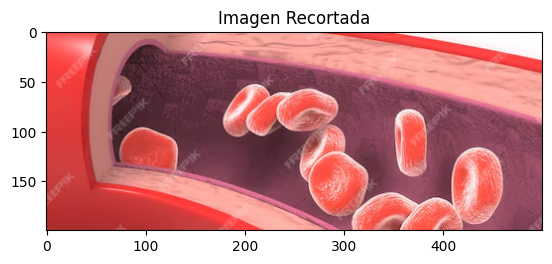

In [ ]:
sana_cropped1 = sana_array1[200:400, 100:600]
plt.imshow(sana_cropped1)
plt.title("Imagen Recortada")

In [ ]:
print(" Los valores estadisticos de la imagen recortada  son")
print("Las dimensiones de la imagen son: ", sana_cropped1.shape)
print("Valor máximo:", np.max(sana_cropped1))
print("Valor mínimo:", np.min(sana_cropped1))
print("Promedio de intensidad:", np.mean(sana_cropped1))
print("Mediana de intensidad:", np.median(sana_cropped1))
print("Desviación estándar:", np.std(sana_cropped1))

 Los valores estadisticos de la imagen recortada  son
Las dimensiones de la imagen son:  (200, 500, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 130.49598333333333
Mediana de intensidad: 117.0
Desviación estándar: 67.02514754826274


Las primeras diferencias que se observan al comparar este análisis con el anterior radican en la naturaleza digital de las imágenes y el estado del objeto analizado. En el caso de las arterias sanas, el mayor flujo sanguíneo genera que los parámetros de promedio y mediana sean significativamente más altos. Esto se debe a la presencia de glóbulos rojos, los cuales presentan un color rojo intenso y brillante en las imágenes. Por otro lado, la desviación estándar es considerablemente menor, ya que el flujo sanguíneo se distribuye de manera uniforme a lo largo de la arteria.



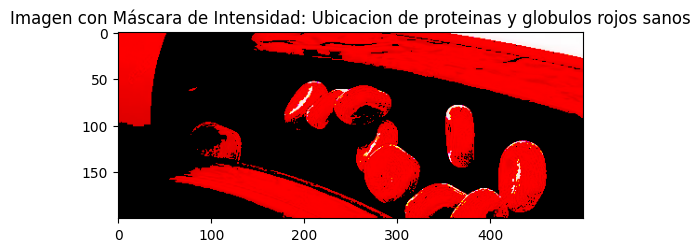

In [ ]:
mask = sana_cropped1 > 220  # Crear una máscara de
masked_imagesana1= np.copy(sana_cropped1)
masked_imagesana1[~mask] = 0  # Aplicar la máscara

plt.figure(figsize=(6,6))
plt.imshow(masked_imagesana1)
plt.title("Imagen con Máscara de Intensidad: Ubicacion de proteinas y globulos rojos sanos")
plt.axis("on")
plt.show()

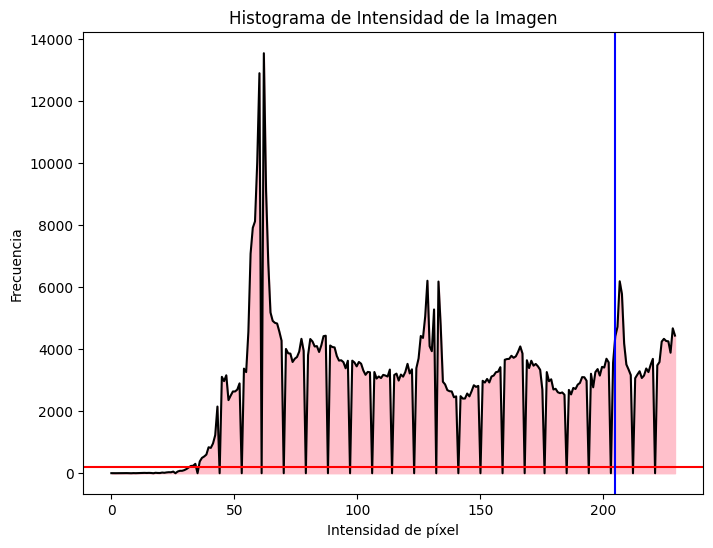

In [ ]:
histogram, bin_edges = np.histogram(sana_array1, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(sana_array1), color='red')
plt.axvline(np.mean(sana_array1), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

En los histogramas vemos otra tendencia y es que las intensidades se encuentran invertidas ( la arteria tapada presenta una mayor intensidad en la zona izquierda del histograma, caso contrario al de las arterias sanas que esta a la derecha). Esto es debido a que en la mayor parte de las arterias tapadas hay grasas, asi que el flujo sanguineo "bueno" solo se encuentra en circulacion en los bordes, mientras que en la arteria sana es en todo el area

##Prueba


In [ ]:
from google.colab import files
uploaded = files.upload()
art_tapada2 = list(uploaded.keys())[0]
#

Saving arteria tapada 2.png to arteria tapada 2.png


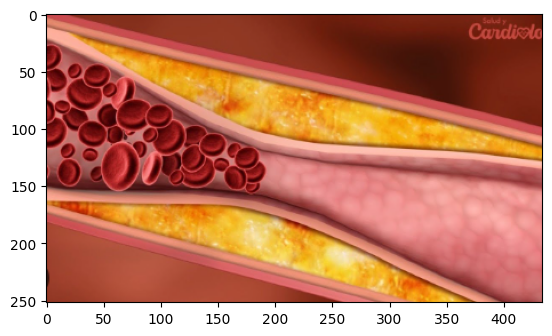

In [ ]:
imagen_3 = Image.open(art_tapada2)

# Convertir la imagen a un array de numpy
imagen_array3 = np.array(imagen_3)

# Mostrar la imagen
plt.imshow(imagen_array3)

In [ ]:
imagen_array3

array([[[195,  80,  78, 255],
        [194,  78,  76, 255],
        [195,  78,  77, 255],
        ...,
        [102,  29,  13, 255],
        [ 98,  28,  11, 255],
        [ 99,  29,  12, 255]],

       [[201,  74,  75, 255],
        [204,  74,  78, 255],
        [204,  73,  79, 255],
        ...,
        [106,  27,  13, 255],
        [104,  25,  12, 255],
        [103,  26,  12, 255]],

       [[198,  82,  76, 255],
        [197,  80,  75, 255],
        [196,  76,  75, 255],
        ...,
        [ 98,  30,  13, 255],
        [ 96,  29,  11, 255],
        [ 97,  29,  12, 255]],

       ...,

       [[145,  54,  35, 255],
        [145,  54,  35, 255],
        [146,  55,  35, 255],
        ...,
        [186, 101, 100, 255],
        [189, 103, 102, 255],
        [190, 103, 102, 255]],

       [[144,  53,  34, 255],
        [144,  53,  34, 255],
        [145,  54,  35, 255],
        ...,
        [181,  95,  94, 255],
        [183,  97,  96, 255],
        [187,  99,  98, 255]],

       [[144

In [ ]:
print("Los valores estadisticos de la imagen son: ")
print("Las dimensiones de la imagen: ", imagen_array3.shape)
print("Valor máximo:", np.max(imagen_array3))
print("Valor mínimo:", np.min(imagen_array3))
print("Promedio de intensidad:", np.mean(imagen_array3))
print("Mediana de intensidad:", np.median(imagen_array3))
print("Desviación estándar:", np.std(imagen_array3))

Los valores estadisticos de la imagen son: 
Las dimensiones de la imagen:  (252, 434, 4)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 150.7938428059396
Mediana de intensidad: 148.0
Desviación estándar: 86.68403266375793


Text(0.5, 1.0, 'Imagen Recortada')

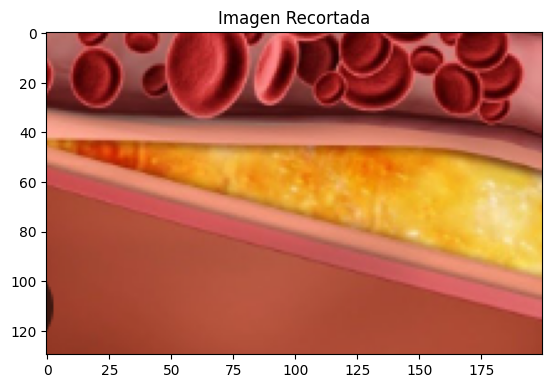

In [ ]:
imagen3_cropped = imagen_array3[120:250 , 0:200]
plt.imshow(imagen3_cropped)
plt.title("Imagen Recortada")

In [ ]:
print(" Los valores estadisticos de la imagen recortada  son")
print("Las dimensiones de la imagen son: ", imagen3_cropped.shape)
print("Valor máximo:", np.max(imagen3_cropped))
print("Valor mínimo:", np.min(imagen3_cropped))
print("Promedio de intensidad:", np.mean(imagen3_cropped))
print("Mediana de intensidad:", np.median(imagen3_cropped))
print("Desviación estándar:", np.std(imagen3_cropped))

 Los valores estadisticos de la imagen recortada  son
Las dimensiones de la imagen son:  (130, 200, 4)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 147.61942307692308
Mediana de intensidad: 147.0
Desviación estándar: 85.22101485399058


In [ ]:
tapada = np.array([153.8,148])
media_tapada = np.mean(tapada)
print(media_tapada)

150.9


Debido a la naturaleza de la segunda imagen de referencia (animada), sus colores son más vibrantes. Por esta razón, a partir de ahora se utilizará el promedio de ambas imágenes en relación con las arterias tapadas, con el fin de obtener resultados más precisos y verídicos.

In [ ]:
if np.mean(imagen3_cropped) < 150 :
  print("Es una arteria tapada ")
else:
  print("Es una arteria sana ")

Es una arteria tapada 


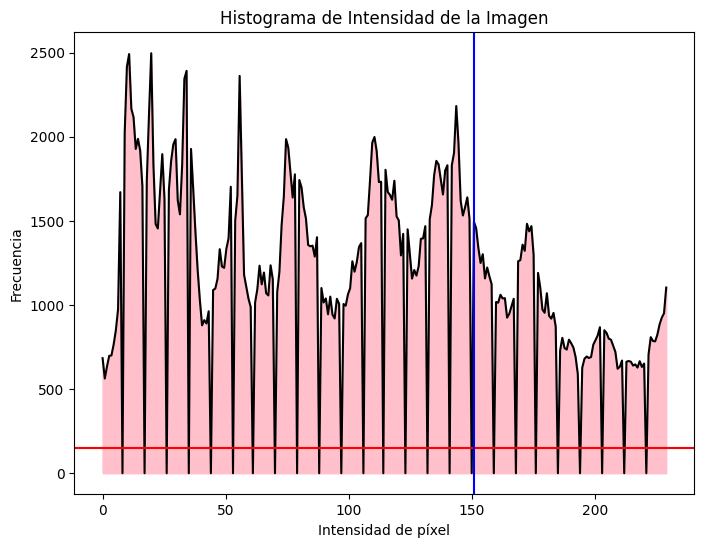

In [ ]:
histogram, bin_edges = np.histogram(imagen_array3, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(imagen_array3), color='red')
plt.axvline(np.mean(imagen_array3), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
imagen4 = list(uploaded.keys())[0]


Saving arteria sana 2.png to arteria sana 2.png


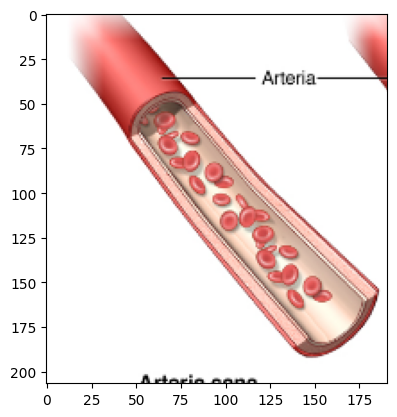

In [ ]:
imagen_4_1 = Image.open(imagen4)

# Convertir la imagen a un array de numpy
imagen_array4 = np.array(imagen_4_1)

# Mostrar la imagen
plt.imshow(imagen_array4)

In [ ]:
print("Los valores estadisticos de la imagen son: ")
print("Las dimensiones de la imagen: ", imagen_array4.shape)
print("Valor máximo:", np.max(imagen_array4))
print("Valor mínimo:", np.min(imagen_array4))
print("Promedio de intensidad:", np.mean(imagen_array4))
print("Mediana de intensidad:", np.median(imagen_array4))
print("Desviación estándar:", np.std(imagen_array4))

Los valores estadisticos de la imagen son: 
Las dimensiones de la imagen:  (207, 191, 4)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 234.76969041657182
Mediana de intensidad: 255.0
Desviación estándar: 47.83832540397741


Text(0.5, 1.0, 'Imagen Recortada')

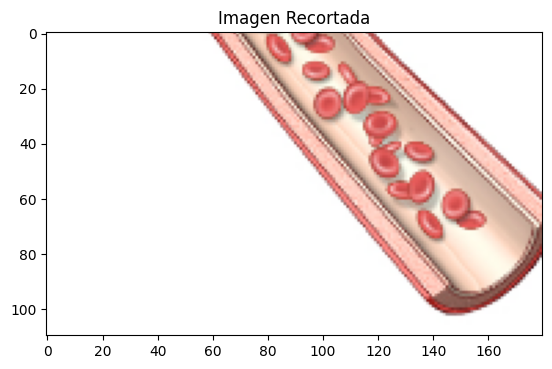

In [ ]:
imagen4_cropped = imagen_array4[90:200 , 0:180]
plt.imshow(imagen4_cropped)
plt.title("Imagen Recortada")

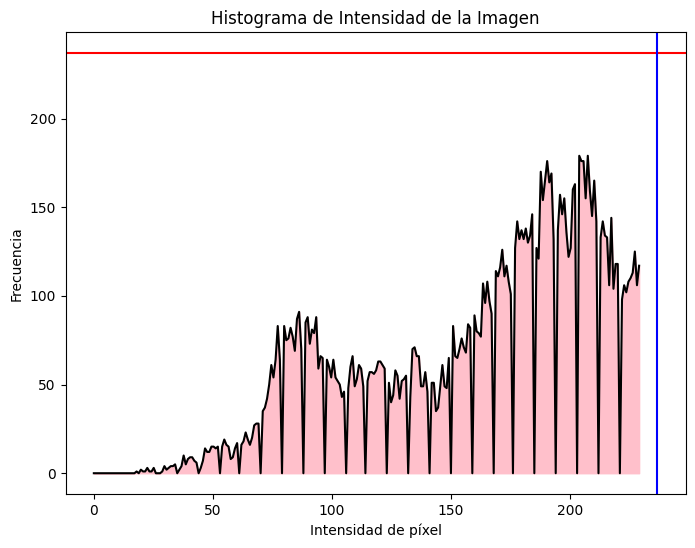

In [ ]:
histogram, bin_edges = np.histogram(imagen4_cropped, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(imagen4_cropped), color='red')
plt.axvline(np.mean(imagen4_cropped), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

In [ ]:
if np.mean(imagen4_cropped) < 150 :
  print("Es una arteria tapada ")
else:
  print("Es una arteria sana")

Es una arteria sana


In [ ]:
from google.colab import files
uploaded = files.upload()
imagen5 = list(uploaded.keys())[0]


Saving arteria sana 3.png to arteria sana 3.png


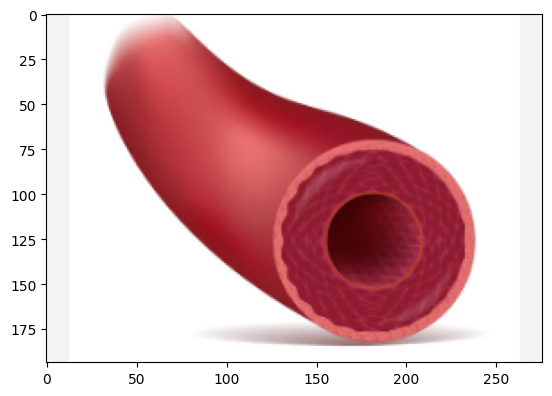

In [ ]:
imagen_5_1 = Image.open(imagen5)

# Convertir la imagen a un array de numpy
imagen_array5 = np.array(imagen_5_1)

# Mostrar la imagen
plt.imshow(imagen_array5)

In [ ]:
print("Los valores estadisticos de la imagen son: ")
print("Las dimensiones de la imagen: ", imagen_array5.shape)
print("Valor máximo:", np.max(imagen_array5))
print("Valor mínimo:", np.min(imagen_array5))
print("Promedio de intensidad:", np.mean(imagen_array5))
print("Mediana de intensidad:", np.median(imagen_array5))
print("Desviación estándar:", np.std(imagen_array5))

Los valores estadisticos de la imagen son: 
Las dimensiones de la imagen:  (194, 276, 4)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 206.70336545644705
Mediana de intensidad: 255.0
Desviación estándar: 78.99198578367097


Text(0.5, 1.0, 'Imagen Recortada')

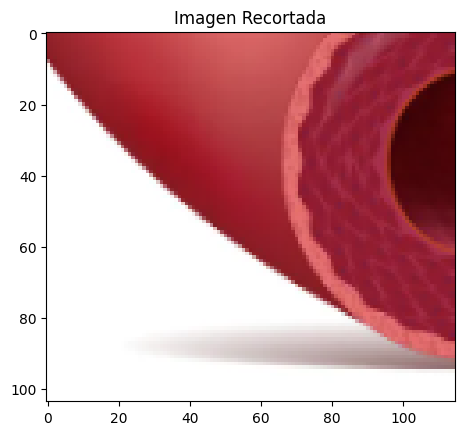

In [ ]:
imagen5_cropped = imagen_array5[90:250 , 60:175]
plt.imshow(imagen5_cropped)
plt.title("Imagen Recortada")

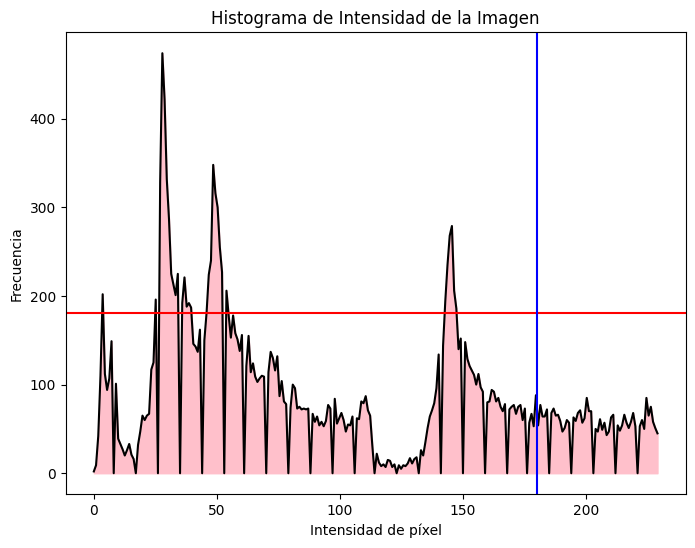

In [ ]:
histogram, bin_edges = np.histogram(imagen5_cropped, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(imagen5_cropped), color='red')
plt.axvline(np.mean(imagen5_cropped), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

In [ ]:
if np.mean(imagen4_cropped) < 150 :
  print("Es una arteria tapada ")
else:
  print("Es una arteria sana")

Es una arteria sana


## Segunda clase:

> ¿La camiseta es del Junior o del nacional?




In [ ]:
from google.colab import files
uploaded = files.upload()
camiseta1 = list(uploaded.keys())[0]

Saving junior 1.png to junior 1.png


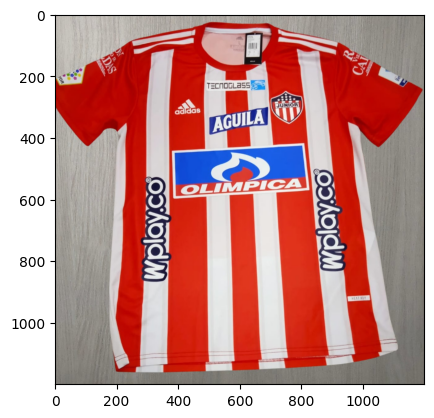

In [ ]:
from PIL import Image

# Cargar la imagen usando Pillow
imagen_1 = Image.open(camiseta1)

# Convertir la imagen a un array de numpy
image_array1 = np.array(imagen_1)

# Mostrar la imagen
plt.imshow(image_array1)


In [ ]:
image_array1

array([[[204, 199, 193],
        [192, 187, 181],
        [190, 185, 179],
        ...,
        [136, 133, 126],
        [130, 127, 120],
        [144, 141, 134]],

       [[202, 197, 191],
        [191, 186, 180],
        [189, 184, 178],
        ...,
        [136, 133, 126],
        [131, 128, 121],
        [144, 141, 134]],

       [[201, 196, 190],
        [190, 185, 179],
        [187, 182, 176],
        ...,
        [136, 133, 126],
        [132, 129, 122],
        [144, 141, 134]],

       ...,

       [[123, 120, 115],
        [128, 125, 120],
        [132, 129, 124],
        ...,
        [113, 108, 102],
        [113, 108, 102],
        [113, 108, 102]],

       [[124, 121, 116],
        [129, 126, 121],
        [133, 130, 125],
        ...,
        [112, 107, 101],
        [112, 107, 101],
        [111, 106, 100]],

       [[125, 122, 117],
        [130, 127, 122],
        [134, 131, 126],
        ...,
        [112, 107, 101],
        [110, 105,  99],
        [110, 105,  99]]

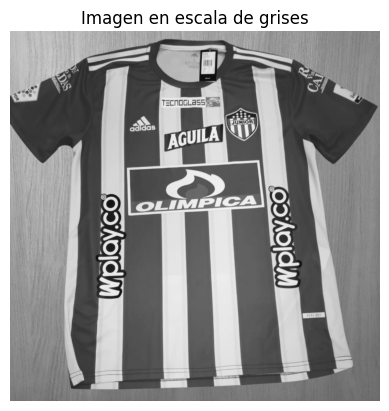

In [ ]:
imagen_bn1 = imagen_1.convert("L")

# Convertir la imagen a un array de numpy
junior_array1 = np.array(imagen_bn1)

# Mostrar la imagen en escala de grises
plt.imshow(junior_array1, cmap='gray')
plt.axis('off')  # Opcional: Oculta los ejes
plt.title("Imagen en escala de grises")
plt.show()

In [ ]:
print("Los valores estadisticos de la imagen (Camiseta del junior) son: ")
print("Las dimensiones de la imagen son: ", image_array1.shape)
print("Valor máximo:", np.max(image_array1))
print("Valor mínimo:", np.min(image_array1))
print("Promedio de intensidad:", np.mean(image_array1))
print("Mediana de intensidad:", np.median(image_array1))
print("Desviación estándar:", np.std(image_array1))

Los valores estadisticos de la imagen (Camiseta del junior) son: 
Las dimensiones de la imagen son:  (1200, 1200, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 135.96628657407408
Mediana de intensidad: 151.0
Desviación estándar: 78.3908827989423


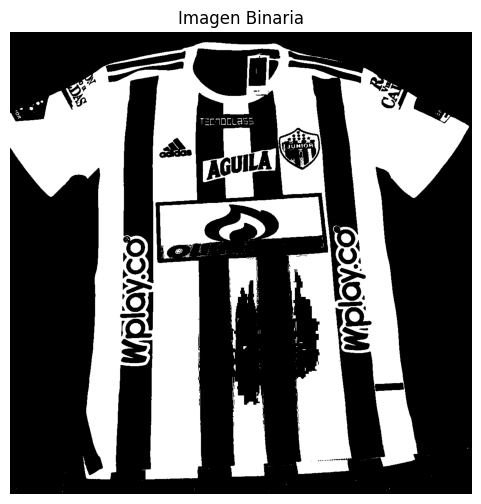

In [ ]:
threshold = 100
binary_image = (junior_array1 < threshold).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title("Imagen Binaria")
plt.axis("off")
plt.show()


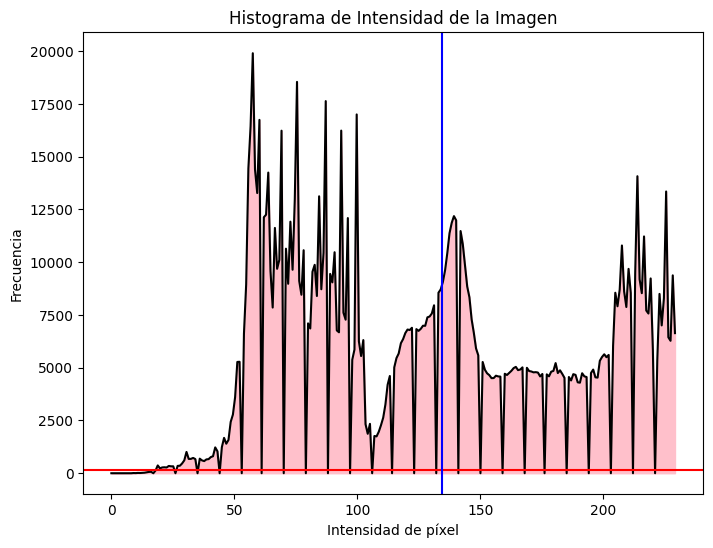

In [ ]:
histogram, bin_edges = np.histogram(junior_array1, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(junior_array1), color='red')
plt.axvline(np.mean(junior_array1), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
camiseta2 = list(uploaded.keys())[0]


Saving nacional 1.jpg to nacional 1.jpg


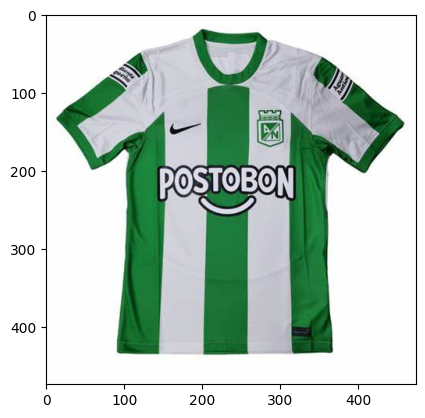

In [ ]:
imagen_2 = Image.open(camiseta2)

# Convertir la imagen a un array de numpy
imagen_array2 = np.array(imagen_2)

# Mostrar la imagen
plt.imshow(imagen_array2)

In [ ]:
print("Los valores estadisticos de la imagen (Camiseta del nacional) son: ")
print("Las dimensiones de la imagen son: ", imagen_array2.shape)
print("Valor máximo:", np.max(imagen_array2))
print("Valor mínimo:", np.min(imagen_array2))
print("Promedio de intensidad:", np.mean(imagen_array2))
print("Mediana de intensidad:", np.median(imagen_array2))
print("Desviación estándar:", np.std(imagen_array2))

Los valores estadisticos de la imagen (Camiseta del nacional) son: 
Las dimensiones de la imagen son:  (474, 474, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 187.71769422041814
Mediana de intensidad: 216.0
Desviación estándar: 83.0443066138706


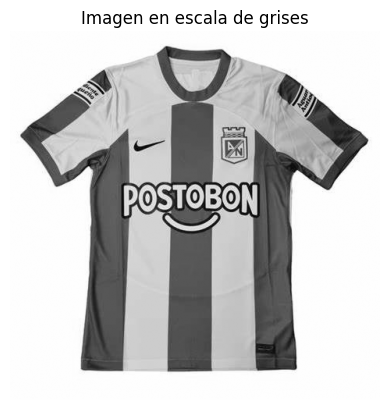

In [ ]:
imagen_bn1 = imagen_2.convert("L")

# Convertir la imagen a un array de numpy
nacional_array1 = np.array(imagen_bn1)

# Mostrar la imagen en escala de grises
plt.imshow(nacional_array1, cmap='gray')
plt.axis('off')  # Opcional: Oculta los ejes
plt.title("Imagen en escala de grises")
plt.show()

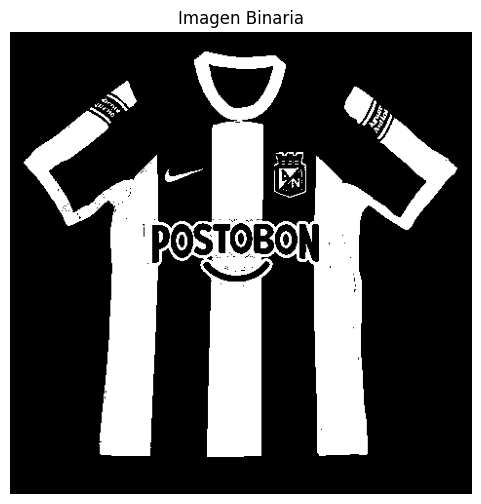

In [ ]:
threshold = 100
binary_image = (nacional_array1 < threshold).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title("Imagen Binaria")
plt.axis("off")
plt.show()


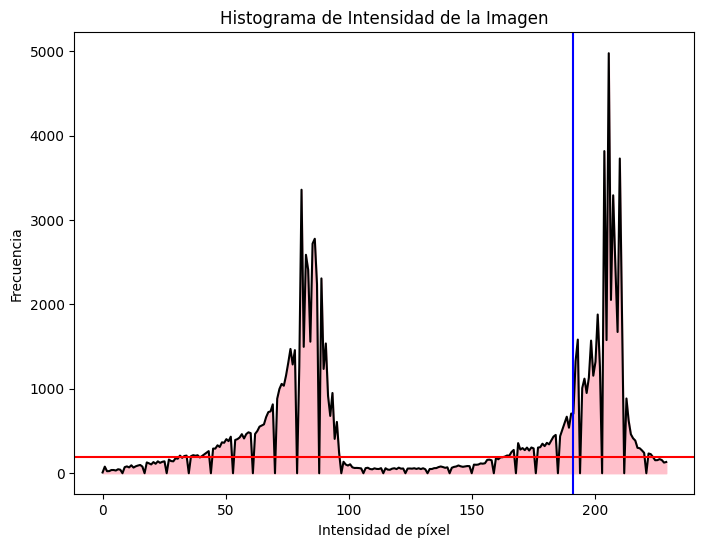

In [ ]:
histogram, bin_edges = np.histogram(nacional_array1, bins=256, range=(0, 230))

# Graficar el histograma
plt.figure(figsize=(8,6))
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.title("Histograma de Intensidad de la Imagen")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Frecuencia")
plt.axhline(np.mean(nacional_array1), color='red')
plt.axvline(np.mean(nacional_array1), color='blue')
plt.fill_between(bin_edges[0:-1], histogram, color='pink')
plt.show()

##pruebas


In [ ]:
from google.colab import files
uploaded = files.upload()
camiseta3 = list(uploaded.keys())[0]

Saving Junior 2.jpg to Junior 2.jpg


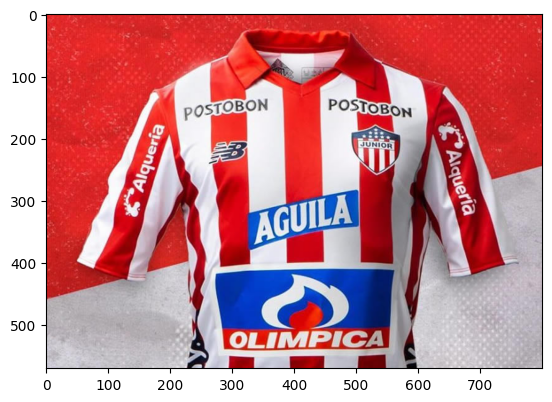

In [ ]:
imagen_3 = Image.open(camiseta3)

# Convertir la imagen a un array de numpy
imagen_array3 = np.array(imagen_3)

# Mostrar la imagen
plt.imshow(imagen_array3)

In [ ]:
print("Los valores estadisticos de la imagen (Camiseta) son: ")
print("Las dimensiones de la imagen son: ", imagen_array3.shape)
print("Valor máximo:", np.max(imagen_array3))
print("Valor mínimo:", np.min(imagen_array3))
print("Promedio de intensidad:", np.mean(imagen_array3))
print("Mediana de intensidad:", np.median(imagen_array3))
print("Desviación estándar:", np.std(imagen_array3))

Los valores estadisticos de la imagen (Camiseta) son: 
Las dimensiones de la imagen son:  (571, 800, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 138.2890747227087
Mediana de intensidad: 176.0
Desviación estándar: 85.62667454239595


In [ ]:
if np.mean(imagen_array3) < 140 :
  print("Es una camiseta del Junior")
else:
  print("Es una camiseta del Nacional")
#

Es una camiseta del Junior


In [ ]:
from google.colab import files
uploaded = files.upload()
camiseta4 = list(uploaded.keys())[0]

Saving nacional 2.jpg to nacional 2.jpg


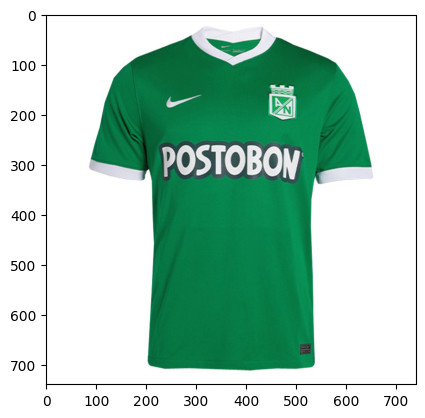

In [ ]:
imagen_4 = Image.open(camiseta4)

# Convertir la imagen a un array de numpy
imagen_array4 = np.array(imagen_4)

# Mostrar la imagen
plt.imshow(imagen_array4)

In [ ]:
print("Los valores estadisticos de la imagen (Camiseta) son: ")
print("Las dimensiones de la imagen son: ", imagen_array4.shape)
print("Valor máximo:", np.max(imagen_array4))
print("Valor mínimo:", np.min(imagen_array4))
print("Promedio de intensidad:", np.mean(imagen_array4))
print("Mediana de intensidad:", np.median(imagen_array4))
print("Desviación estándar:", np.std(imagen_array4))

Los valores estadisticos de la imagen (Camiseta) son: 
Las dimensiones de la imagen son:  (207, 191, 4)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 234.76969041657182
Mediana de intensidad: 255.0
Desviación estándar: 47.83832540397741


In [ ]:
if np.mean(imagen_array4) < 140 :
  print("Es una camiseta del Junior")
else:
  print("Es una camiseta del Nacional")


Es una camiseta del Nacional


In [ ]:
from google.colab import files
uploaded = files.upload()
camiseta5 = list(uploaded.keys())[0]

Saving nacional 3.jpg to nacional 3.jpg


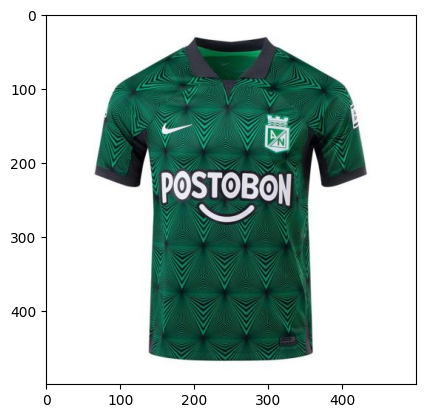

In [ ]:
imagen_5 = Image.open(camiseta5)

# Convertir la imagen a un array de numpy
imagen_array5 = np.array(imagen_5)

# Mostrar la imagen
plt.imshow(imagen_array5)

In [ ]:
print("Los valores estadisticos de la imagen (Camiseta) son: ")
print("Las dimensiones de la imagen son: ", imagen_array5.shape)
print("Valor máximo:", np.max(imagen_array5))
print("Valor mínimo:", np.min(imagen_array5))
print("Promedio de intensidad:", np.mean(imagen_array5))
print("Mediana de intensidad:", np.median(imagen_array5))
print("Desviación estándar:", np.std(imagen_array5))

Los valores estadisticos de la imagen (Camiseta) son: 
Las dimensiones de la imagen son:  (500, 500, 3)
Valor máximo: 255
Valor mínimo: 0
Promedio de intensidad: 170.90001066666667
Mediana de intensidad: 255.0
Desviación estándar: 101.31378463368092


In [ ]:
if np.mean(imagen_array5) < 140 :
  print("Es una camiseta del Junior")
else:
  print("Es una camiseta del Nacional")


Es una camiseta del Nacional


In [ ]:
import os
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files

# 1. Subir imágenes a Colab
uploaded = files.upload()

# 2. Crear la estructura de directorios necesaria
dataset_path = "/content/dataset"
os.makedirs(dataset_path, exist_ok=True)

# 3. Mover las imágenes subidas a la estructura de directorios
for filename in uploaded.keys():
    # Reemplazar espacios en el nombre del archivo
    filename_clean = filename.replace(" ", "_")

    # Obtener el nombre de la arteria (asumiendo que el nombre del archivo tiene el formato "arteria_imagen.jpg")
    arteria = filename_clean.split('_')[0]

    # Crear la ruta de la carpeta de la arteria
    arteria_path = os.path.join(dataset_path, arteria)
    os.makedirs(arteria_path, exist_ok=True)

    # Mover el archivo a la carpeta correspondiente
    os.rename(filename, os.path.join(arteria_path, filename_clean))

# 4. Verificar la estructura de directorios
print("Estructura de directorios después de organizar las imágenes:")
for root, dirs, files in os.walk(dataset_path):
    print(root, dirs, files)

# 5. Lista de arterias (asumiendo que las carpetas tienen el nombre de las arterias)
arterias = os.listdir(dataset_path)

# 6. Procesar las imágenes (ahora para varias imágenes por categoría)
muestras = {}
for arteria in arterias:
    arteria_path = os.path.join(dataset_path, arteria)
    imagenes = []  # Lista para almacenar varias imágenes de la misma categoría
    for imagen_nombre in os.listdir(arteria_path):
        ruta_imagen = os.path.join(arteria_path, imagen_nombre)
        imagen = io.imread(ruta_imagen)  # Cargar la imagen en color original
        imagenes.append(imagen)  # Agregar la imagen a la lista
    muestras[arteria] = imagenes  # Guardar la lista de imágenes en el diccionario

# 7. Verificar el diccionario `muestras`
print("\nContenido del diccionario `muestras`:")
for arteria, imagenes in muestras.items():
    print(f"{arteria}: {len(imagenes)} imágenes")

# 8. Mostrar algunas imágenes de muestra (en color original)
for arteria, imagenes in muestras.items():
    print(f"\nMostrando imágenes de {arteria}:")
    for i, imagen in enumerate(imagenes[:3]):  # Mostrar solo las primeras 3 imágenes por categoría
        plt.figure()
        plt.imshow(imagen)  # Mostrar la imagen en color original
        plt.title(f"Imagen {i+1} de {arteria} (color original)")
        plt.axis('off')

Estructura de directorios después de organizar las imágenes:
/content/dataset [] []

Contenido del diccionario `muestras`:


In [ ]:
!pip install pandas statsmodels

In [ ]:
# Crear un DataFrame para ANOVA
df_anova = pd.DataFrame({
    "Intensidad": np.concatenate(data),  # Concatenar todos los datos de intensidad
    "Arteria": np.concatenate(grupos)    # Concatenar todas las etiquetas de arteria
})

# Realizar la prueba ANOVA
stat, p_value = f_oneway(*data)
print(f"\nPrueba ANOVA: estadístico F = {stat:.4f}, valor p = {p_value:.4f}")

if p_value < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas entre las clases de arterias.")
else:
    print("Conclusión: No se encontraron diferencias estadísticamente significativas entre las clases de arterias.")

# Generar una tabla ANOVA
modelo = ols('Intensidad ~ C(Arteria)', data=df_anova).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar la tabla ANOVA
print("\nTabla ANOVA:")
print(tabla_anova)


Prueba ANOVA: estadístico F = 167144.7625, valor p = 0.0000
Conclusión: Hay diferencias estadísticamente significativas entre las clases de arterias.

Tabla ANOVA:
                  sum_sq          df             F  PR(>F)
C(Arteria)  6.207263e+09         4.0  225171.62393     0.0
Residual    7.282570e+10  10567156.0           NaN     NaN


In [ ]:

import pandas as pd

# 10. Crear un DataFrame para ANOVA
df_anova = pd.DataFrame({
    "Intensidad": np.concatenate(data),  # Concatenar todos los datos de intensidad
    "Categoria": np.concatenate(grupos)  # Concatenar todas las etiquetas de categoría
})

# 11. Realizar la prueba ANOVA
stat, p_value = f_oneway(*data)
print(f"\nPrueba ANOVA: estadístico F = {stat:.4f}, valor p = {p_value:.4f}")

if p_value < 0.05:
    print("Conclusión: Hay diferencias estadísticamente significativas entre las categorías de camisetas.")
else:
    print("Conclusión: No se encontraron diferencias estadísticamente significativas entre las categorías de camisetas.")

# 12. Generar una tabla ANOVA
modelo = ols('Intensidad ~ C(Categoria)', data=df_anova).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# 13. Mostrar la tabla ANOVA
print("\nTabla ANOVA:")
print(tabla_anova)


Prueba ANOVA: estadístico F = 112613.9514, valor p = 0.0000
Conclusión: Hay diferencias estadísticamente significativas entre las categorías de camisetas.

Tabla ANOVA:
                     sum_sq         df              F  PR(>F)
C(Categoria)   42685.859781        5.0  117543.493546     0.0
Residual      352918.334548  4859133.0            NaN     NaN


#Representacion en Boxplots " Diferencias entre clases (arterias)"

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


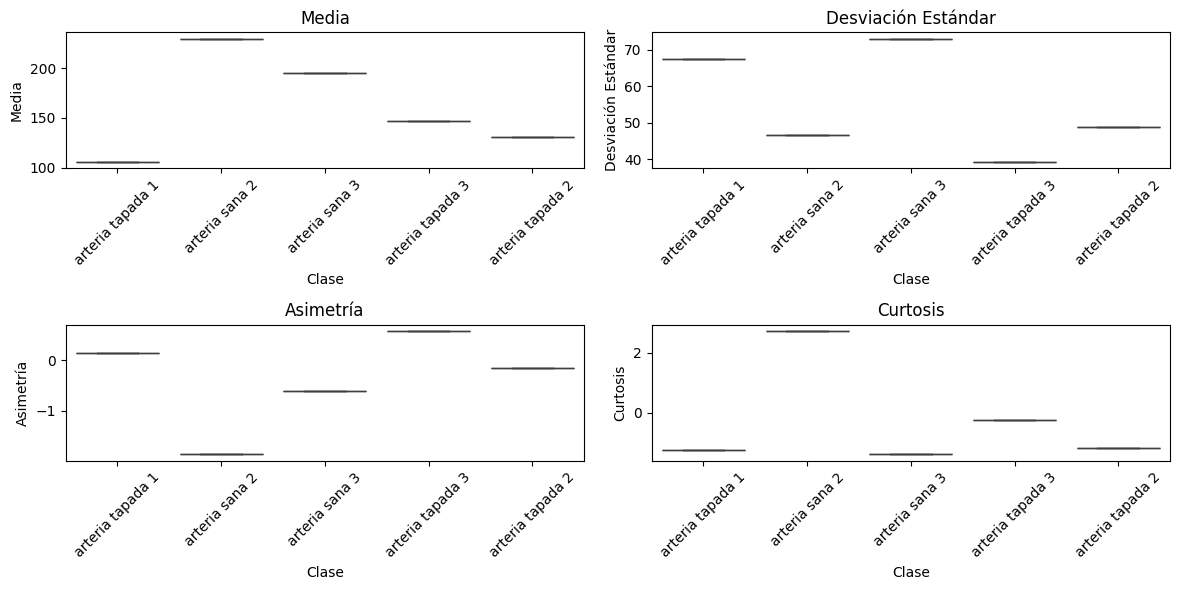

In [ ]:
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import os
from google.colab import drive
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la carpeta con imágenes en Google Drive
ruta_imagenes = "/content/drive/My Drive/Imagenes"

# Verificar si la carpeta existe
if not os.path.exists(ruta_imagenes):
    print(f"Error: La carpeta '{ruta_imagenes}' no existe.")
else:
    imagenes_lista = os.listdir(ruta_imagenes)

    # Lista para almacenar estadísticas
    data = []

    for img_nombre in imagenes_lista:
        img_path = os.path.join(ruta_imagenes, img_nombre)
        imagen = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if imagen is None:
            continue  # Si la imagen no se carga, omitir

        pixeles = imagen.flatten()

        # Calcular estadísticas
        media = np.mean(pixeles)
        std_dev = np.std(pixeles)
        asimetria = skew(pixeles)
        curtosis_valor = kurtosis(pixeles)

        # Usar el nombre de la imagen como clase
        clase = os.path.splitext(img_nombre)[0]

        # Guardar en la lista
        data.append([img_nombre, clase, media, std_dev, asimetria, curtosis_valor])

    # Crear DataFrame
    df = pd.DataFrame(data, columns=["Imagen", "Clase", "Media", "Desviación Estándar", "Asimetría", "Curtosis"])

    # Guardar en un archivo CSV
    df.to_csv("estadisticas_imagenes.csv", index=False)

    # Visualización con Boxplots
    plt.figure(figsize=(12, 6))
    for i, columna in enumerate(["Media", "Desviación Estándar", "Asimetría", "Curtosis"], 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df["Clase"], y=df[columna])
        plt.title(columna)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Representacion en Boxplots " Diferencias entre clases (camisas de futbol)"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


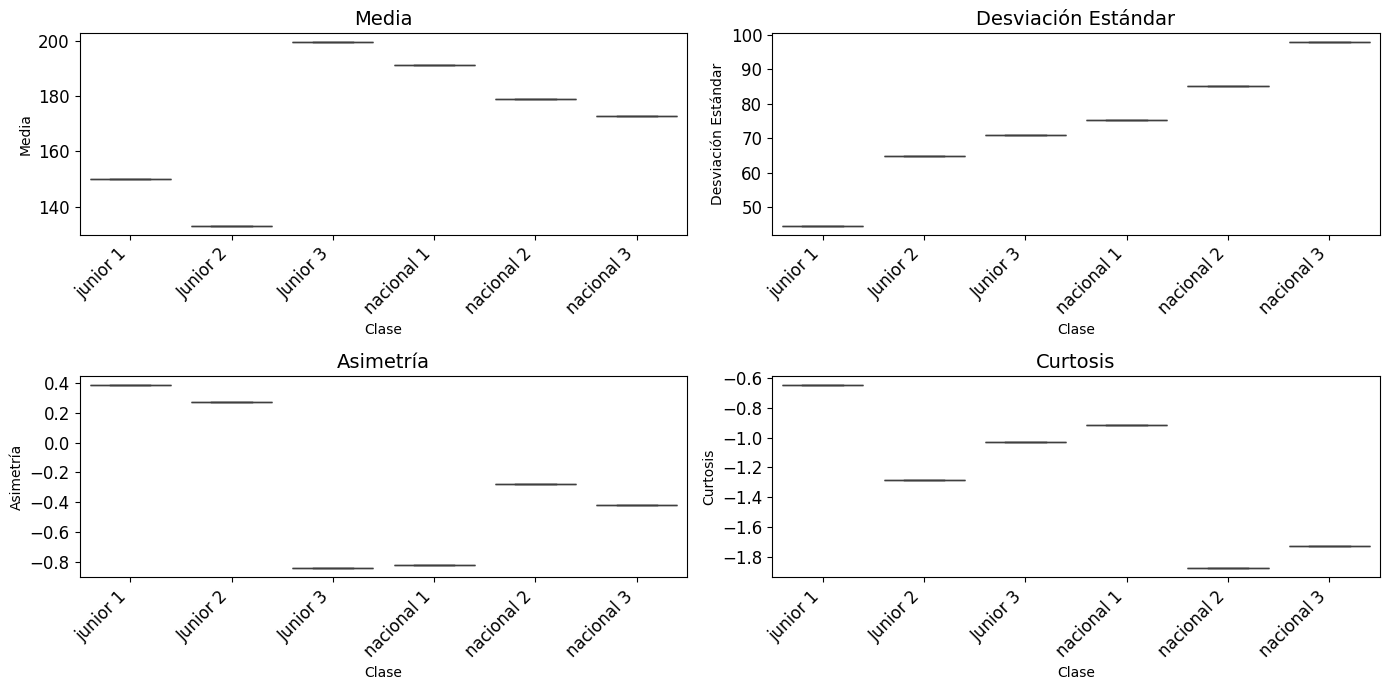

In [ ]:
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import os
import numpy as np
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la carpeta con imágenes en Google Drive
ruta_imagenes = "/content/drive/My Drive/Imagenes2"

# Verificar si la carpeta existe
if not os.path.exists(ruta_imagenes):
    print(f"Error: La carpeta '{ruta_imagenes}' no existe.")
else:
    imagenes_lista = os.listdir(ruta_imagenes)

    # Lista para almacenar estadísticas
    data = []

    for img_nombre in imagenes_lista:
        img_path = os.path.join(ruta_imagenes, img_nombre)
        imagen = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if imagen is None:
            continue  # Si la imagen no se carga, omitir

        pixeles = imagen.flatten()

        # Calcular estadísticas
        media = np.mean(pixeles)
        std_dev = np.std(pixeles)
        asimetria = skew(pixeles)
        curtosis_valor = kurtosis(pixeles)

        # Usar el nombre del archivo como la clase (nombre de la camiseta)
        clase = os.path.splitext(img_nombre)[0]

        # Guardar en la lista
        data.append([img_nombre, clase, media, std_dev, asimetria, curtosis_valor])

    # Crear DataFrame
    df = pd.DataFrame(data, columns=["Imagen", "Clase", "Media", "Desviación Estándar", "Asimetría", "Curtosis"])

    # Guardar en un archivo CSV
    df.to_csv("estadisticas_imagenes.csv", index=False)

    # Visualización con Boxplots
    plt.figure(figsize=(14, 7))
    for i, columna in enumerate(["Media", "Desviación Estándar", "Asimetría", "Curtosis"], 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df["Clase"], y=df[columna])
        plt.title(columna, fontsize=14)
        plt.xticks(rotation=45, ha="right", fontsize=12)
        plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


#Para mejorar la visualizacion de los datos implementare un grafico de barras

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-cf7cd3e3a9a1>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Clase"], y=df["Media"], palette="coolwarm")


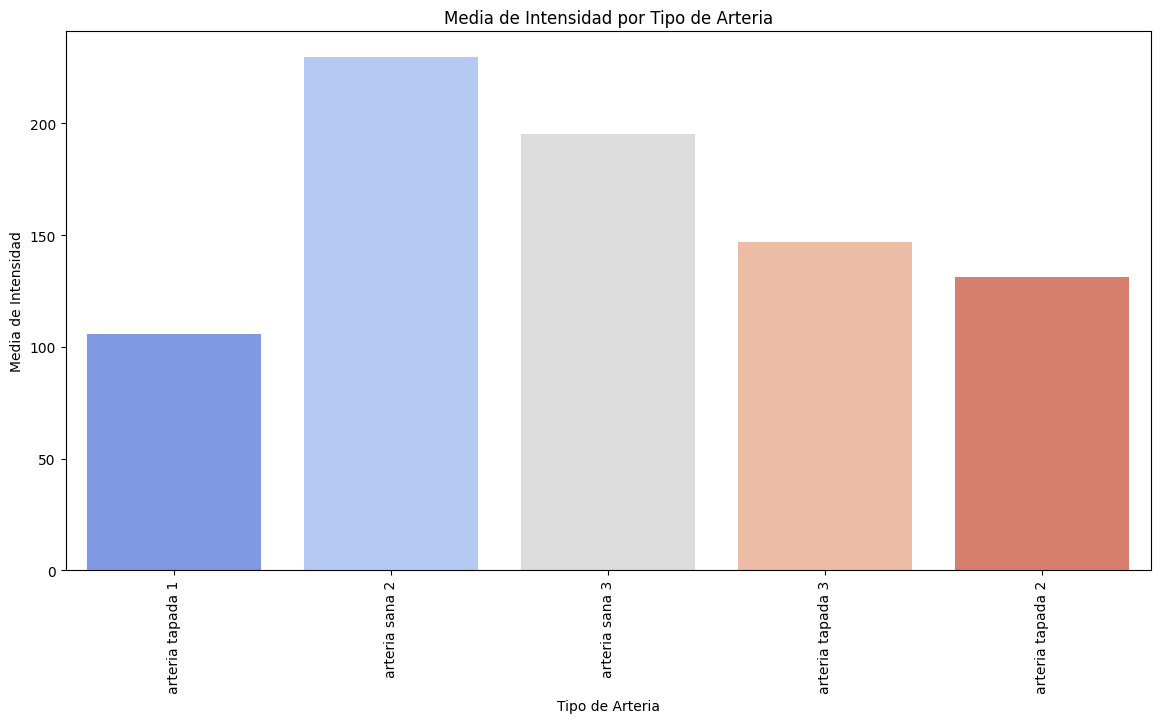

In [ ]:
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import os
from google.colab import drive
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la carpeta con imágenes en Google Drive
ruta_imagenes = "/content/drive/My Drive/Imagenes"

# Verificar si la carpeta existe
if not os.path.exists(ruta_imagenes):
    print(f"Error: La carpeta '{ruta_imagenes}' no existe.")
else:
    imagenes_lista = os.listdir(ruta_imagenes)

    # Lista para almacenar estadísticas
    data = []

    for img_nombre in imagenes_lista:
        img_path = os.path.join(ruta_imagenes, img_nombre)
        imagen = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if imagen is None:
            continue  # Si la imagen no se carga, omitir

        pixeles = imagen.flatten()

        # Calcular estadísticas
        media = np.mean(pixeles)
        std_dev = np.std(pixeles)
        asimetria = skew(pixeles)
        curtosis_valor = kurtosis(pixeles)

        # Usar el nombre del archivo como clase (tipo de arteria)
        clase = os.path.splitext(img_nombre)[0]

        # Guardar en la lista
        data.append([img_nombre, clase, media, std_dev, asimetria, curtosis_valor])

    # Crear DataFrame
    df = pd.DataFrame(data, columns=["Imagen", "Clase", "Media", "Desviación Estándar", "Asimetría", "Curtosis"])

    # Guardar en un archivo CSV
    df.to_csv("estadisticas_arterias.csv", index=False)

    # Visualización con Gráfico de Barras
    plt.figure(figsize=(14, 7))
    sns.barplot(x=df["Clase"], y=df["Media"], palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("Media de Intensidad por Tipo de Arteria")
    plt.xlabel("Tipo de Arteria")
    plt.ylabel("Media de Intensidad")
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-d7e4f8cb2c19>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Clase"], y=df["Media"], palette="viridis")


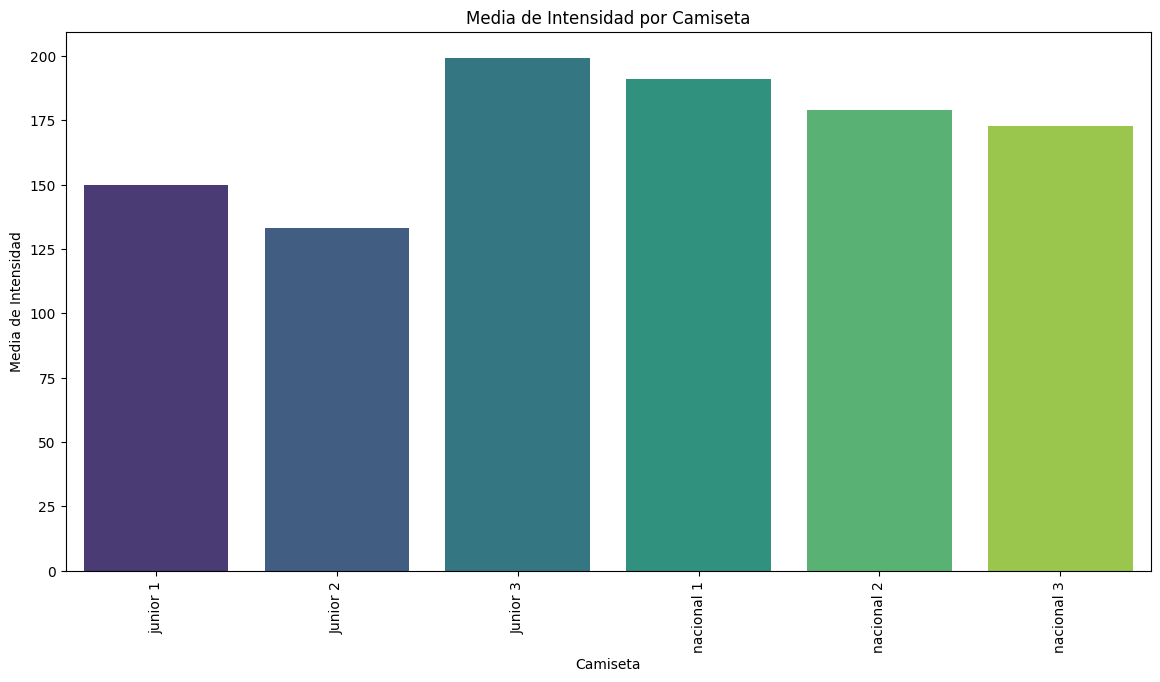

In [ ]:
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import os
from google.colab import drive
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la carpeta con imágenes en Google Drive
ruta_imagenes = "/content/drive/My Drive/Imagenes2"

# Verificar si la carpeta existe
if not os.path.exists(ruta_imagenes):
    print(f"Error: La carpeta '{ruta_imagenes}' no existe.")
else:
    imagenes_lista = os.listdir(ruta_imagenes)

    # Lista para almacenar estadísticas
    data = []

    for img_nombre in imagenes_lista:
        img_path = os.path.join(ruta_imagenes, img_nombre)
        imagen = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if imagen is None:
            continue  # Si la imagen no se carga, omitir

        pixeles = imagen.flatten()

        # Calcular estadísticas
        media = np.mean(pixeles)
        std_dev = np.std(pixeles)
        asimetria = skew(pixeles)
        curtosis_valor = kurtosis(pixeles)

        # Usar el nombre de la imagen como la clase (camiseta analizada)
        clase = os.path.splitext(img_nombre)[0]

        # Guardar en la lista
        data.append([img_nombre, clase, media, std_dev, asimetria, curtosis_valor])

    # Crear DataFrame
    df = pd.DataFrame(data, columns=["Imagen", "Clase", "Media", "Desviación Estándar", "Asimetría", "Curtosis"])

    # Guardar en un archivo CSV
    df.to_csv("estadisticas_imagenes.csv", index=False)

    # Visualización con Gráfico de Barras
    plt.figure(figsize=(14, 7))
    sns.barplot(x=df["Clase"], y=df["Media"], palette="viridis")
    plt.xticks(rotation=90)
    plt.title("Media de Intensidad por Camiseta")
    plt.xlabel("Camiseta")
    plt.ylabel("Media de Intensidad")
    plt.show()


**Aplicaciones del analisis de imagen**
1. Diagnóstico médico: Las diferencias en la distribución de intensidades pueden usarse para identificar arterias tapadas o con problemas de flujo sanguíneo.
2. Automatización del análisis: Algoritmos de Machine Learning pueden entrenarse con estos datos para detectar enfermedades cardiovasculares de manera más eficiente.
3. Reconocimiento de camisetas: Se pueden entrenar modelos de visión por computadora para clasificar automáticamente camisetas de distintos equipos.
4. Optimización en ventas: Un sistema automatizado podría identificar camisetas a partir de fotos y sugerir productos en una tienda online.

**Dependiendo del objetivo final, estos análisis pueden complementarse con técnicas más avanzadas como segmentación de imágenes o aprendizaje profundo.**

In [ ]:
!jupyter nbconvert --to html /content/Entregable_1_1.ipynb

[NbConvertApp] Converting notebook /content/Entregable_1_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 36 image(s).
[NbConvertApp] Writing 5436180 bytes to /content/Entregable_1_1.html
